Montage de Google Drive sur Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Upload de fichiers sur Google Colab

In [ ]:
from google.colab import files

# Sélectionner et uploader le fichier
uploaded = files.upload()


Saving instagram_comments.csv to instagram_comments.csv


Déplacement d'un fichier vers Google Drive sur Google Colab

In [ ]:
# Déplacer le fichier vers Google Drive
import shutil


shutil.move("instagram_comments.csv", "/content/drive/MyDrive/instagram_comments.csv")

print(" Fichier uploadé avec succès dans Google Drive !")

 Fichier uploadé avec succès dans Google Drive !


Chargement et exploration d'un fichier CSV depuis Google Drive sur Google Colab

In [ ]:
import pandas as pd

# Remplace "mon_fichier.csv" par le chemin correct dans Drive
file_path = "/content/drive/MyDrive/instagram_comments.csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(file_path)

# Afficher les premières lignes du DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Commenter  2383 non-null   object
 1   Comment    2657 non-null   object
dtypes: object(2)
memory usage: 47.2+ KB


In [ ]:
!pip install google-api-python-client

Scraping des commentaires YouTube et sauvegarde dans un fichier CSV sur Google Drive

In [ ]:
import csv
from googleapiclient.discovery import build

# Clé API YouTube
API_KEY = 'votre_api_key'

# Liste des ID des vidéos
VIDEO_IDS = [
    'rYyXl7QUZik',  # ID de la première vidéo
    'qQDtmXC1Ijw',  # ID de la deuxième vidéo
    'rxhC81AwtEA',  # ID de la troisième vidéo
    'ZidGozDhOjg',  # ID de la quatrième vidéo
    'OGmscaAswR4'   # ID de la cinquième vidéo
]

# Chemin du fichier CSV sur Google Drive
CSV_FILE_PATH = '/content/drive/MyDrive/instagram_comments.csv'

# Initialiser l'API YouTube
youtube = build('youtube', 'v3', developerKey=API_KEY)

# Fonction pour récupérer les commentaires
def get_video_comments(video_id):
    comments = []
    next_page_token = None

    while True:
        # Appel à l'API pour récupérer les commentaires
        request = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            pageToken=next_page_token,
            textFormat='plainText',
            maxResults=100  # Nombre maximal de commentaires par requête
        )
        response = request.execute()

        # Extraire les commentaires
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comments.append([
                comment['authorDisplayName'],  # Nom du commentateur
                comment['textDisplay']         # Texte du commentaire
            ])

        # Vérifier s'il y a une page suivante
        next_page_token = response.get('nextPageToken')
        if not next_page_token:
            break

    return comments

# Fonction pour ajouter les commentaires à un fichier CSV existant
def append_comments_to_csv(comments, file_path):
    with open(file_path, mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerows(comments)  # Ajouter les commentaires à la fin du fichier

# Boucle sur chaque vidéo pour récupérer et ajouter les commentaires
for video_id in VIDEO_IDS:
    comments = get_video_comments(video_id)
    append_comments_to_csv(comments, CSV_FILE_PATH)
    print(f"Commentaires de la vidéo {video_id} ajoutés à {CSV_FILE_PATH}.")

print("Scraping terminé pour toutes les vidéos.")


Commentaires de la vidéo rYyXl7QUZik ajoutés à /content/drive/MyDrive/instagram_comments.csv.
Commentaires de la vidéo qQDtmXC1Ijw ajoutés à /content/drive/MyDrive/instagram_comments.csv.
Commentaires de la vidéo rxhC81AwtEA ajoutés à /content/drive/MyDrive/instagram_comments.csv.
Commentaires de la vidéo ZidGozDhOjg ajoutés à /content/drive/MyDrive/instagram_comments.csv.
Commentaires de la vidéo OGmscaAswR4 ajoutés à /content/drive/MyDrive/instagram_comments.csv.
Scraping terminé pour toutes les vidéos.


Chargement et aperçu des commentaires YouTube depuis un fichier CSV sur Google Drive

In [3]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv('/content/drive/MyDrive/instagram_comments.csv')

# Afficher les premières lignes du fichier CSV
print(df.head())  # Affiche les 5 premières lignes du CSV

          Commenter                       Comment
0         ur.aman.1                          Nice
1  ek_adhuri_talash                    Wow superb
2      aarthiraman_             Congratulations 😍
3      chhav.ibisht          Hyundai is Perfect 😍
4       gar_ima_rao  Perfect Car for your family😍


In [ ]:
df

,Commenter,Comment
0,ur.aman.1,Nice
1,ek_adhuri_talash,Wow superb
2,aarthiraman_,Congratulations 😍
3,chhav.ibisht,Hyundai is Perfect 😍
4,gar_ima_rao,Perfect Car for your family😍
...,...,...
10703,@BardovBacchus,"Or, wear what you like and *set* the trend for..."
10704,@daria504,"Yes for baby pink and boho chic, as I wear it ..."
10705,@dorkaballa-johnson1214,So articulate and fun to listen to! my favorit...
10706,@tamaranatasha5927,Your lip colour is gorgeous!


Vérification de la dimension du DataFrame

In [ ]:
df.shape

(10708, 2)

Affichage des informations générales du DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10708 entries, 0 to 10707
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Commenter  10078 non-null  object
 1   Comment    10353 non-null  object
dtypes: object(2)
memory usage: 167.4+ KB


Prétraitement des commentaires Instagram : nettoyage, tokenization et lemmatisation

In [4]:
import pandas as pd
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer

# Télécharger les ressources nécessaires de NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
nltk.download('punkt_tab')  # Ajoutez cette ligne pour télécharger la ressource manquante

# Initialiser les outils de NLTK
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

# Fonction de prétraitement
def Preprocess_listofSentence(listofSentence):
    preprocess_list = []
    for sentence in listofSentence:
        # Supprimer la ponctuation et mettre en minuscule
        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

        # Supprimer les chiffres
        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

        # Tokenization
        tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)

        # Supprimer les stopwords
        words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]

        # Lemmatisation
        words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)

        # Rejoindre les mots en une seule chaîne
        sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())

        preprocess_list.append(sentence_clean)

    return preprocess_list

# Charger le fichier CSV
df = pd.read_csv('/content/drive/MyDrive/instagram_comments.csv')

# Supprimer les doublons
df = df.drop_duplicates()

# Remplacer les valeurs NaN par une chaîne vide
df = df.dropna()

# Fonction pour supprimer les emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Appliquer la fonction de suppression des emojis
df['Comment'] = df['Comment'].apply(remove_emojis)

# Appliquer le prétraitement
df['comment_cleaned'] = Preprocess_listofSentence(df['Comment'])

# Afficher les premières lignes du DataFrame nettoyé
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


          Commenter                      Comment     comment_cleaned
0         ur.aman.1                         Nice                nice
1  ek_adhuri_talash                   Wow superb          wow superb
2      aarthiraman_             Congratulations       congratulation
3      chhav.ibisht          Hyundai is Perfect              perfect
4       gar_ima_rao  Perfect Car for your family  perfect car family


In [5]:
df

,Commenter,Comment,comment_cleaned
0,ur.aman.1,Nice,nice
1,ek_adhuri_talash,Wow superb,wow superb
2,aarthiraman_,Congratulations,congratulation
3,chhav.ibisht,Hyundai is Perfect,perfect
4,gar_ima_rao,Perfect Car for your family,perfect car family
...,...,...,...
10703,@BardovBacchus,"Or, wear what you like and *set* the trend for...",wear like set trend trust people notice stand ...
10704,@daria504,"Yes for baby pink and boho chic, as I wear it ...",yes baby pink boho chic wear lot kind white lo...
10705,@dorkaballa-johnson1214,So articulate and fun to listen to! my favorit...,articulate fun listen favorite fashion
10706,@tamaranatasha5927,Your lip colour is gorgeous!,lip colour gorgeous


Nettoyage et prétraitement des commentaires Instagram : suppression des emojis, stopwords, lemmatisation et gestion des valeurs manquantes

In [6]:
import pandas as pd
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer

# Télécharger les ressources nécessaires de NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
nltk.download('punkt_tab')  # Ajoutez cette ligne pour télécharger la ressource manquante

# Initialiser les outils de NLTK
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

# Fonction de prétraitement
def Preprocess_listofSentence(listofSentence):
    preprocess_list = []
    for sentence in listofSentence:
        # Supprimer la ponctuation et mettre en minuscule
        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

        # Supprimer les chiffres
        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

        # Tokenization
        tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)

        # Supprimer les stopwords
        words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]

        # Lemmatisation
        words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)

        # Rejoindre les mots en une seule chaîne
        sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())

        preprocess_list.append(sentence_clean)

    return preprocess_list

# Charger le fichier CSV
df = pd.read_csv('/content/drive/MyDrive/instagram_comments.csv')

# Supprimer les doublons
df = df.drop_duplicates()

# Remplacer les valeurs NaN par une chaîne vide
df = df.fillna('')

# Fonction pour supprimer les emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Appliquer la fonction de suppression des emojis
df['Comment'] = df['Comment'].apply(remove_emojis)

# Appliquer le prétraitement
df['comment_cleaned'] = Preprocess_listofSentence(df['Comment'])

# Supprimer les lignes où 'comment_cleaned' est une chaîne vide ou contient uniquement des espaces blancs
df['comment_cleaned'] = df['comment_cleaned'].str.strip()  # Supprimer les espaces blancs
df = df[df['comment_cleaned'] != '']  # Supprimer les chaînes vides

# Réinitialiser l'index après la suppression des lignes
df = df.reset_index(drop=True)

# Afficher les premières lignes du DataFrame nettoyé
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


          Commenter                      Comment     comment_cleaned
0         ur.aman.1                         Nice                nice
1  ek_adhuri_talash                   Wow superb          wow superb
2      aarthiraman_             Congratulations       congratulation
3      chhav.ibisht          Hyundai is Perfect              perfect
4       gar_ima_rao  Perfect Car for your family  perfect car family


In [7]:
df

,Commenter,Comment,comment_cleaned
0,ur.aman.1,Nice,nice
1,ek_adhuri_talash,Wow superb,wow superb
2,aarthiraman_,Congratulations,congratulation
3,chhav.ibisht,Hyundai is Perfect,perfect
4,gar_ima_rao,Perfect Car for your family,perfect car family
...,...,...,...
7421,@BardovBacchus,"Or, wear what you like and *set* the trend for...",wear like set trend trust people notice stand ...
7422,@daria504,"Yes for baby pink and boho chic, as I wear it ...",yes baby pink boho chic wear lot kind white lo...
7423,@dorkaballa-johnson1214,So articulate and fun to listen to! my favorit...,articulate fun listen favorite fashion
7424,@tamaranatasha5927,Your lip colour is gorgeous!,lip colour gorgeous


In [8]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=17880d889f35e6eb665eba1e00cd40d127438e361358f0a4000512a482519de0
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


Prétraitement avancé des commentaires Instagram : suppression des emojis, stopwords, lemmatisation, détection de la langue et filtrage des commentaires non pertinents

In [9]:
import pandas as pd
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer
from langdetect import detect

# Télécharger les ressources nécessaires de NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

# Initialiser les outils de NLTK
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

# Fonction de prétraitement améliorée
def Preprocess_listofSentence(listofSentence):
    preprocess_list = []
    for sentence in listofSentence:
        # Supprimer la ponctuation et mettre en minuscule
        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])

        # Supprimer les chiffres
        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

        # Tokenization
        tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)

        # Supprimer les stopwords
        words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]

        # Lemmatisation
        words_lemmatize = [lemmatizer.lemmatize(w) for w in words_w_stopwords]

        # Filtrer les mots vides ou incomplets
        words_filtered = [w for w in words_lemmatize if w.isalpha() and len(w) > 1]

        # Rejoindre les mots en une seule chaîne
        sentence_clean = ' '.join(words_filtered)

        preprocess_list.append(sentence_clean)

    return preprocess_list

# Charger le fichier CSV
df = pd.read_csv('/content/drive/MyDrive/instagram_comments.csv')

# Supprimer les doublons dans les commentaires originaux
df = df.drop_duplicates(subset=['Comment'])

# Remplacer les valeurs NaN par une chaîne vide
df = df.fillna('')

# Fonction pour supprimer les emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Appliquer la fonction de suppression des emojis
df['Comment'] = df['Comment'].apply(remove_emojis)

# Appliquer le prétraitement
df['comment_cleaned'] = Preprocess_listofSentence(df['Comment'])

# Détecter et supprimer les commentaires en français
def detect_language(text):
    try:
        return detect(text) if text.strip() else 'unknown'
    except:
        return 'unknown'

df['language'] = df['comment_cleaned'].apply(detect_language)
df = df[df['language'] != 'fr']  # Supprimer les commentaires en français

# Supprimer les doublons dans les commentaires prétraités
df = df.drop_duplicates(subset=['comment_cleaned'])

# Supprimer les commentaires trop courts ou non pertinents
df = df[df['comment_cleaned'].str.len() >= 3]

# Réinitialiser l'index
df = df.reset_index(drop=True)

# Afficher les premières lignes du DataFrame nettoyé
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


          Commenter                      Comment     comment_cleaned language
0         ur.aman.1                         Nice                nice       pl
1  ek_adhuri_talash                   Wow superb          wow superb       pl
2      aarthiraman_             Congratulations       congratulation       it
3      chhav.ibisht          Hyundai is Perfect      hyundai perfect       cy
4       gar_ima_rao  Perfect Car for your family  perfect car family       en


In [10]:
df

,Commenter,Comment,comment_cleaned,language
0,ur.aman.1,Nice,nice,pl
1,ek_adhuri_talash,Wow superb,wow superb,pl
2,aarthiraman_,Congratulations,congratulation,it
3,chhav.ibisht,Hyundai is Perfect,hyundai perfect,cy
4,gar_ima_rao,Perfect Car for your family,perfect car family,en
...,...,...,...,...
6877,@carefullbob8136,"Lady Ciara,Hi from Minnesota.\nI'm a man fan o...",lady ciarahi minnesota im man fan fromtry chan...,en
6878,@BardovBacchus,"Or, wear what you like and *set* the trend for...",wear like set trend trust people notice stand ...,en
6879,@daria504,"Yes for baby pink and boho chic, as I wear it ...",yes baby pink boho chic wear lot kind bored wh...,en
6880,@dorkaballa-johnson1214,So articulate and fun to listen to! my favorit...,articulate fun listen favorite fashion youtuber,en


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Commenter        6882 non-null   object
 1   Comment          6882 non-null   object
 2   comment_cleaned  6882 non-null   object
 3   language         6882 non-null   object
dtypes: object(4)
memory usage: 215.2+ KB


Ajout des sentiments aux commentaires Instagram à l'aide du modèle DistilBERT

In [12]:
import pandas as pd
from transformers import pipeline, AutoTokenizer

# Charger le modèle et le tokenizer
model_name = "distilbert/distilbert-base-uncased-finetuned-sst-2-english"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Fonction pour tronquer les tokens
def truncate_tokens(text, max_tokens=512):
    # Tokenizer le texte
    tokens = tokenizer.encode(text, truncation=True, max_length=max_tokens, return_tensors="pt")
    # Décoder les tokens tronqués en texte
    truncated_text = tokenizer.decode(tokens[0], skip_special_tokens=True)
    return truncated_text

# Fonction pour labelliser les commentaires
def label_sentiment(text):
    # Tronquer les tokens avant de les passer au modèle
    truncated_text = truncate_tokens(text)
    result = sentiment_pipeline(truncated_text)[0]
    return result['label']

# Appliquer la fonction à la colonne 'comment_cleaned'
df['sentiment'] = df['comment_cleaned'].apply(label_sentiment)

# Afficher les premières lignes avec les sentiments
print(df[['comment_cleaned', 'sentiment']].head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Device set to use cpu


      comment_cleaned sentiment
0                nice  POSITIVE
1          wow superb  POSITIVE
2      congratulation  POSITIVE
3     hyundai perfect  POSITIVE
4  perfect car family  POSITIVE


In [13]:
df

,Commenter,Comment,comment_cleaned,language,sentiment
0,ur.aman.1,Nice,nice,pl,POSITIVE
1,ek_adhuri_talash,Wow superb,wow superb,pl,POSITIVE
2,aarthiraman_,Congratulations,congratulation,it,POSITIVE
3,chhav.ibisht,Hyundai is Perfect,hyundai perfect,cy,POSITIVE
4,gar_ima_rao,Perfect Car for your family,perfect car family,en,POSITIVE
...,...,...,...,...,...
6877,@carefullbob8136,"Lady Ciara,Hi from Minnesota.\nI'm a man fan o...",lady ciarahi minnesota im man fan fromtry chan...,en,POSITIVE
6878,@BardovBacchus,"Or, wear what you like and *set* the trend for...",wear like set trend trust people notice stand ...,en,NEGATIVE
6879,@daria504,"Yes for baby pink and boho chic, as I wear it ...",yes baby pink boho chic wear lot kind bored wh...,en,POSITIVE
6880,@dorkaballa-johnson1214,So articulate and fun to listen to! my favorit...,articulate fun listen favorite fashion youtuber,en,POSITIVE


Analyse de sentiment multilingue des commentaires Instagram avec XLM-RoBERTa

In [14]:
from transformers import pipeline, AutoTokenizer

# Charger un modèle multilingue (XLM-RoBERTa)
model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Fonction pour tronquer les tokens
def truncate_tokens(text, max_tokens=512):
    tokens = tokenizer.encode(text, truncation=True, max_length=max_tokens, return_tensors="pt")
    truncated_text = tokenizer.decode(tokens[0], skip_special_tokens=True)
    return truncated_text

# Fonction pour labelliser les commentaires
def label_sentiment_multilingual(text):
    truncated_text = truncate_tokens(text)
    result = sentiment_pipeline(truncated_text)[0]
    return result['label']

# Appliquer le modèle à tous les commentaires
df['sentiment'] = df['comment_cleaned'].apply(label_sentiment_multilingual)




# Afficher les premières lignes
print(df[['comment_cleaned', 'sentiment']].head())

Device set to use cpu


      comment_cleaned sentiment
0                nice  positive
1          wow superb  positive
2      congratulation  positive
3     hyundai perfect  positive
4  perfect car family  positive


In [ ]:
df

,Commenter,Comment,comment_cleaned,language,sentiment
0,ur.aman.1,Nice,nice,pl,positive
1,ek_adhuri_talash,Wow superb,wow superb,pl,positive
2,aarthiraman_,Congratulations,congratulation,it,positive
3,chhav.ibisht,Hyundai is Perfect,hyundai perfect,cy,positive
4,gar_ima_rao,Perfect Car for your family,perfect car family,en,positive
...,...,...,...,...,...
6874,@carefullbob8136,"Lady Ciara,Hi from Minnesota.\nI'm a man fan o...",lady ciarahi minnesota im man fan fromtry chan...,en,positive
6875,@BardovBacchus,"Or, wear what you like and *set* the trend for...",wear like set trend trust people notice stand ...,en,neutral
6876,@daria504,"Yes for baby pink and boho chic, as I wear it ...",yes baby pink boho chic wear lot kind bored wh...,en,neutral
6877,@dorkaballa-johnson1214,So articulate and fun to listen to! my favorit...,articulate fun listen favorite fashion youtuber,en,positive


Correction manuelle des erreurs de sentiment dans les commentaires Instagram

In [15]:
# Correction des erreurs de sentiment
df.loc[df['comment_cleaned'] == 'hyundai perfect', 'sentiment'] = 'positive'
df.loc[df['comment_cleaned'] == 'one care leave chill', 'sentiment'] = 'negative'
df.loc[df['comment_cleaned'] == 'need audio', 'sentiment'] = 'negative'
df.loc[df['comment_cleaned'] == 'caket bgt', 'sentiment'] = 'neutral'
df.loc[df['comment_cleaned'] == 'one notice one', 'sentiment'] = 'negative'
df.loc[df['comment_cleaned'] == 'hahaha irish whiskey', 'sentiment'] = 'positive'
df.loc[df['comment_cleaned'] == 'sbenz look familiar', 'sentiment'] = 'neutral'
df.loc[df['comment_cleaned'] == 'aime', 'sentiment'] = 'positive'
df.loc[df['comment_cleaned'] == 'dirtkat', 'sentiment'] = 'neutral'
df.loc[df['comment_cleaned'] == 'teritidmorekrulee', 'sentiment'] = 'neutral'
df.loc[df['comment_cleaned'] == 'beachthalken guy need break passing', 'sentiment'] = 'neutral'
df.loc[df['comment_cleaned'] == 'local', 'sentiment'] = 'neutral'
df.loc[df['comment_cleaned'] == 'sierrarrs', 'sentiment'] = 'neutral'
df.loc[df['comment_cleaned'] == 'lildevils', 'sentiment'] = 'neutral'
df.loc[df['comment_cleaned'] == 'prnidbby', 'sentiment'] = 'neutral'
df.loc[df['comment_cleaned'] == 'mrsvierra', 'sentiment'] = 'neutral'
df.loc[df['comment_cleaned'] == 'grandof10', 'sentiment'] = 'neutral'
df.iloc[226, df.columns.get_loc('sentiment')] = "neutral"
df.iloc[234, df.columns.get_loc('sentiment')] = "neutral"
df.iloc[239, df.columns.get_loc('sentiment')] = "neutral"
df.iloc[244, df.columns.get_loc('sentiment')] = "neutral"
df.iloc[250, df.columns.get_loc('sentiment')] = 'negative'
df.iloc[255, df.columns.get_loc('sentiment')] = 'neutral'
df.loc[df['comment_cleaned'] == 'soo prettyyyyyyyy', 'sentiment'] = 'positive'
df.loc[df['comment_cleaned'] == 'cakep bgt', 'sentiment'] = 'positive'
df.loc[df['comment_cleaned'] == 'ab travel vlogs bhi aenge', 'sentiment'] = 'neutral'



In [16]:
df

,Commenter,Comment,comment_cleaned,language,sentiment
0,ur.aman.1,Nice,nice,pl,positive
1,ek_adhuri_talash,Wow superb,wow superb,pl,positive
2,aarthiraman_,Congratulations,congratulation,it,positive
3,chhav.ibisht,Hyundai is Perfect,hyundai perfect,cy,positive
4,gar_ima_rao,Perfect Car for your family,perfect car family,en,positive
...,...,...,...,...,...
6877,@carefullbob8136,"Lady Ciara,Hi from Minnesota.\nI'm a man fan o...",lady ciarahi minnesota im man fan fromtry chan...,en,positive
6878,@BardovBacchus,"Or, wear what you like and *set* the trend for...",wear like set trend trust people notice stand ...,en,neutral
6879,@daria504,"Yes for baby pink and boho chic, as I wear it ...",yes baby pink boho chic wear lot kind bored wh...,en,neutral
6880,@dorkaballa-johnson1214,So articulate and fun to listen to! my favorit...,articulate fun listen favorite fashion youtuber,en,positive


Filtrage, étiquetage et sauvegarde des commentaires Instagram avec analyse de sentiment

In [17]:
# Sélectionner les colonnes nécessaires
df_filtered = df[['comment_cleaned', 'sentiment']]

# Sauvegarder le DataFrame filtré dans un fichier CSV
df_filtered.to_csv('/content/drive/MyDrive/data_label.csv', index=False)

# Afficher un message pour confirmer que le fichier a été sauvegardé
print("Fichier CSV sauvegardé avec succès !")


Fichier CSV sauvegardé avec succès !


Chargement du fichier CSV contenant les commentaires étiquetés

In [1]:
import pandas as pd

# Charger le fichier CSV
df1 = pd.read_csv('/content/drive/MyDrive/data_label.csv')
df1

,comment_cleaned,sentiment
0,nice,positive
1,wow superb,positive
2,congratulation,positive
3,hyundai perfect,positive
4,perfect car family,positive
...,...,...
6877,lady ciarahi minnesota im man fan fromtry chan...,positive
6878,wear like set trend trust people notice stand ...,neutral
6879,yes baby pink boho chic wear lot kind bored wh...,neutral
6880,articulate fun listen favorite fashion youtuber,positive


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   comment_cleaned  6882 non-null   object
 1   sentiment        6882 non-null   object
dtypes: object(2)
memory usage: 107.7+ KB


 Target Variable Distribution

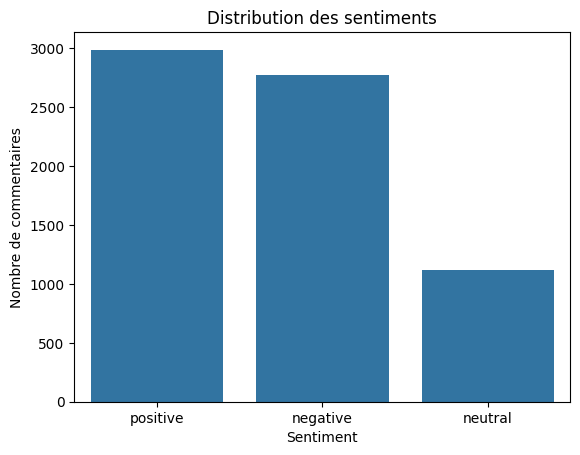

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compter les sentiments
sentiment_counts = df1['sentiment'].value_counts()

# Afficher un graphique à barres
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution des sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Nombre de commentaires')
plt.show()

In [5]:
sentiment_counts

,count
sentiment,
positive,2989
negative,2772
neutral,1121


Text Preprocessing

In [7]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Prétraitement des commentaires : nettoyage, lemmatisation et tokenisation avec NLTK et spaCy

In [8]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os
import shutil
import spacy  # Importer spaCy

# Charger le modèle spaCy pour l'anglais
nlp = spacy.load("en_core_web_sm")

# Supprimer et retélécharger les ressources NLTK
nltk_data_dir = '/root/nltk_data'
if os.path.exists(nltk_data_dir):
    shutil.rmtree(nltk_data_dir)

# Télécharger les ressources nécessaires de NLTK
nltk.download('stopwords', force=True)  # Forcer le retéléchargement des stopwords
nltk.download('wordnet', force=True)

# Charger le fichier CSV
df1 = pd.read_csv('/content/drive/MyDrive/data_label.csv')

# Convertir le texte en minuscules
df1.loc[:, 'comment_cleaned'] = df1['comment_cleaned'].str.lower()

# Supprimer la ponctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

df1.loc[:, 'comment_cleaned'] = df1['comment_cleaned'].apply(remove_punctuation)

# Supprimer les chiffres
df1.loc[:, 'comment_cleaned'] = df1['comment_cleaned'].str.replace('\d+', '', regex=True)

# Supprimer les caractères de nouvelle ligne et de retour chariot
df1.loc[:, 'comment_cleaned'] = df1['comment_cleaned'].str.replace('\n', ' ').str.replace('\r', '')

# Supprimer les stopwords
stop_words = set(stopwords.words('english'))  # Cette ligne devrait maintenant fonctionner
df1.loc[:, 'comment_cleaned'] = df1['comment_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Lemmatisation
lemmatizer = WordNetLemmatizer()
df1.loc[:, 'comment_cleaned'] = df1['comment_cleaned'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Supprimer les espaces supplémentaires
df1.loc[:, 'comment_cleaned'] = df1['comment_cleaned'].str.replace('\s+', ' ', regex=True).str.strip()

# Tokenisation du texte dans la colonne 'comment_cleaned' avec spaCy
df1['tokens'] = df1['comment_cleaned'].apply(lambda x: [token.text for token in nlp(x)])

# Afficher le DataFrame après prétraitement
print(df1.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


      comment_cleaned sentiment                  tokens
0                nice  positive                  [nice]
1          wow superb  positive           [wow, superb]
2      congratulation  positive        [congratulation]
3     hyundai perfect  positive      [hyundai, perfect]
4  perfect car family  positive  [perfect, car, family]


In [9]:
df1

,comment_cleaned,sentiment,tokens
0,nice,positive,[nice]
1,wow superb,positive,"[wow, superb]"
2,congratulation,positive,[congratulation]
3,hyundai perfect,positive,"[hyundai, perfect]"
4,perfect car family,positive,"[perfect, car, family]"
...,...,...,...
6877,lady ciarahi minnesota im man fan fromtry chan...,positive,"[lady, ciarahi, minnesota, i, m, man, fan, fro..."
6878,wear like set trend trust people notice stand ...,neutral,"[wear, like, set, trend, trust, people, notice..."
6879,yes baby pink boho chic wear lot kind bored wh...,neutral,"[yes, baby, pink, boho, chic, wear, lot, kind,..."
6880,articulate fun listen favorite fashion youtuber,positive,"[articulate, fun, listen, favorite, fashion, y..."


Relationship Between Sentiment and Length of Text

In [10]:
 #Calculer la longueur du texte (nombre de mots)
df1['text_length'] = df1['comment_cleaned'].apply(lambda x: len(x.split()))

# Afficher les premières lignes du DataFrame avec la nouvelle colonne
print(df1.head())




      comment_cleaned sentiment                  tokens  text_length
0                nice  positive                  [nice]            1
1          wow superb  positive           [wow, superb]            2
2      congratulation  positive        [congratulation]            1
3     hyundai perfect  positive      [hyundai, perfect]            2
4  perfect car family  positive  [perfect, car, family]            3


Visualisation de la distribution de la longueur des textes par sentiment avec un graphique en violon

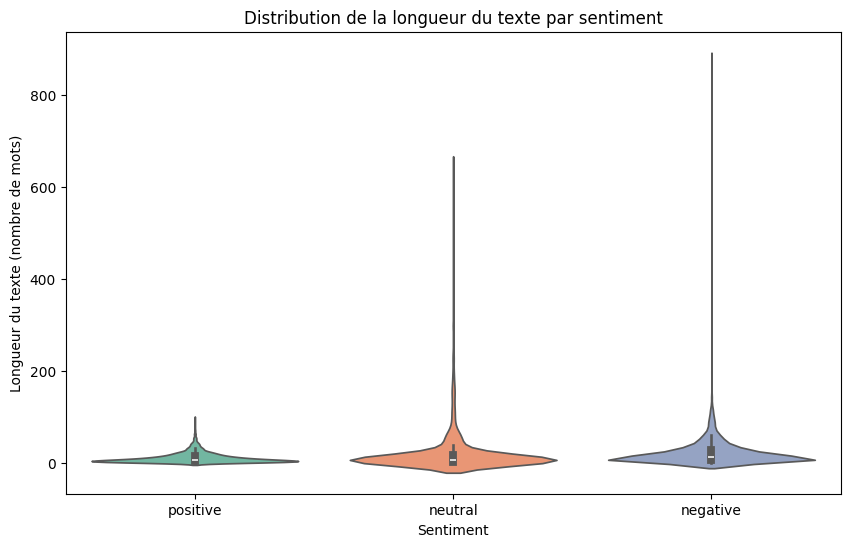

In [27]:
# Importer les bibliothèques manquantes
import matplotlib.pyplot as plt
import seaborn as sns
# Violin plot pour une visualisation plus détaillée
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment', y='text_length', hue='sentiment', data=df1, palette='Set2', legend=False)
plt.title('Distribution de la longueur du texte par sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Longueur du texte (nombre de mots)')
plt.show()


Feature Encoding

Prétraitement des textes et encodage des sentiments avec TF-IDF et OrdinalEncoder

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Étape 1 : Combiner les tokens en une seule chaîne de caractères
df1['processed_text'] = df1['comment_cleaned'].apply(lambda x: ' '.join(x.split()))

# Étape 2 : TF-IDF Vectorization
# Initialiser le vectoriseur TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiter à 5000 features pour l'efficacité

# Appliquer TF-IDF sur la colonne 'processed_text'
X_tfidf = tfidf_vectorizer.fit_transform(df1['processed_text'])

# Afficher la forme de la matrice TF-IDF
print("Forme de la matrice TF-IDF :", X_tfidf.shape)

# Étape 3 : Encodage des sentiments
# Définir l'ordre des catégories pour l'encodage ordinal
sentiment_categories = [['negative', 'neutral', 'positive']]

# Initialiser l'encodeur ordinal
ordinal_encoder = OrdinalEncoder(categories=sentiment_categories)

# Appliquer l'encodage sur la colonne 'sentiment'
y_encoded = ordinal_encoder.fit_transform(df1[['sentiment']])

# Aplatir le résultat en un tableau 1D
y = y_encoded.flatten()

# Afficher les valeurs encodées
print("Valeurs encodées pour les sentiments :", y)

# Étape 4 : Sauvegarder les résultats (optionnel)
# Vous pouvez sauvegarder X_tfidf et y dans un fichier pour une utilisation ultérieure
import scipy.sparse

# Sauvegarder la matrice TF-IDF
scipy.sparse.save_npz('/content/drive/MyDrive/X_tfidf.npz', X_tfidf)

# Sauvegarder les labels encodés
np.save('/content/drive/MyDrive/y.npy', y)

# Afficher un aperçu des données
print("\nAperçu des données après encodage :")
print("Matrice TF-IDF (5 premières lignes) :")
print(X_tfidf[:5].toarray())  # Afficher les 5 premières lignes de la matrice TF-IDF
print("Labels encodés (5 premières valeurs) :", y[:5])

Forme de la matrice TF-IDF : (6882, 5000)
Valeurs encodées pour les sentiments : [2. 2. 2. ... 1. 2. 2.]

Aperçu des données après encodage :
Matrice TF-IDF (5 premières lignes) :
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Labels encodés (5 premières valeurs) : [2. 2. 2. 2. 2.]


Sauvegarde du TF-IDF Vectorizer et de l'Encodeur des Sentiments

In [57]:
import joblib

# Sauvegarder le TF-IDF Vectorizer
joblib.dump(tfidf_vectorizer, '/content/drive/MyDrive/tfidf_vectorizer_multiple.pkl')

# Sauvegarder l'encodeur des labels
joblib.dump(ordinal_encoder, '/content/drive/MyDrive/label_encoder_multiple.pkl')

print("TF-IDF Vectorizer et Ordinal Encoder sauvegardés avec succès !")


TF-IDF Vectorizer et Ordinal Encoder sauvegardés avec succès !


In [12]:
!pip install imbalanced-learn

Analyse de la Distribution Initiale des Classes

In [13]:
#Random Oversampling
# Afficher la distribution initiale des classes
print("\nDistribution initiale des classes :")
print(pd.Series(y).value_counts())


Distribution initiale des classes :
2.0    2989
0.0    2772
1.0    1121
Name: count, dtype: int64


Suréchantillonnage des Classes avec RandomOversampling

In [14]:
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd

# Afficher la distribution initiale des classes
print("Distribution initiale des classes :")
print(pd.Series(y).value_counts())

# Définir la stratégie de suréchantillonnage
# Ici, nous doublons la taille des classes minoritaires (neutral et negative)
# La classe positive reste inchangée
sampling_strategy = {
    0: 5544,  # neutral : 2772 * 2 = 5544
    1: 2242,  # negative : 1121 * 2 = 2242
    2: 2989   # positive : inchangé
}

# Vérifier que les valeurs de sampling_strategy sont valides
for class_label, n_samples in sampling_strategy.items():
    current_samples = (y == class_label).sum()
    if n_samples < current_samples:
        raise ValueError(f"Le nombre d'échantillons demandé pour la classe {class_label} ({n_samples}) est inférieur au nombre actuel ({current_samples}).")

# Initialiser le RandomOverSampler avec la stratégie définie
oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)

# Appliquer le suréchantillonnage sur les données TF-IDF et les labels
X_resampled, y_resampled = oversampler.fit_resample(X_tfidf, y)

# Afficher la distribution des classes après suréchantillonnage
print("\nDistribution des classes après suréchantillonnage :")
print(pd.Series(y_resampled).value_counts())

# Afficher un aperçu des données après suréchantillonnage
print("\nAperçu des données après suréchantillonnage :")
print("Forme de X_resampled :", X_resampled.shape)
print("Forme de y_resampled :", y_resampled.shape)

Distribution initiale des classes :
2.0    2989
0.0    2772
1.0    1121
Name: count, dtype: int64

Distribution des classes après suréchantillonnage :
0.0    5544
2.0    2989
1.0    2242
Name: count, dtype: int64

Aperçu des données après suréchantillonnage :
Forme de X_resampled : (10775, 5000)
Forme de y_resampled : (10775,)


Data Splitting

Division des Données en Ensembles d'Entraînement et de Test

In [15]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Afficher la forme des ensembles d'entraînement et de test
print("Forme de X_train :", X_train.shape)
print("Forme de X_test :", X_test.shape)
print("Forme de y_train :", y_train.shape)
print("Forme de y_test :", y_test.shape)

# Afficher la distribution des classes dans les ensembles d'entraînement et de test
print("\nDistribution des classes dans y_train :")
print(pd.Series(y_train).value_counts())

print("\nDistribution des classes dans y_test :")
print(pd.Series(y_test).value_counts())

Forme de X_train : (8620, 5000)
Forme de X_test : (2155, 5000)
Forme de y_train : (8620,)
Forme de y_test : (2155,)

Distribution des classes dans y_train :
0.0    4435
2.0    2391
1.0    1794
Name: count, dtype: int64

Distribution des classes dans y_test :
0.0    1109
2.0     598
1.0     448
Name: count, dtype: int64


Application de SMOTE pour le rééchantillonnage des classes minoritaires

In [16]:
from imblearn.over_sampling import SMOTE

# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Afficher la distribution des classes après SMOTE
print("Distribution des classes après SMOTE :")
print(pd.Series(y_train_resampled).value_counts())

Distribution des classes après SMOTE :
2.0    4435
0.0    4435
1.0    4435
Name: count, dtype: int64


Entraînement et Prédiction avec la Régression Logistique Multinomiale

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# 1. Initialiser le modèle de régression logistique multinomiale
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# 2. Entraîner le modèle sur l'ensemble d'entraînement rééchantillonné (SMOTE)
logistic_model.fit(X_train_resampled, y_train_resampled)

# 3. Faire des prédictions sur l'ensemble de test
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)  # Probabilités pour chaque classe



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# 4. Évaluer le modèle
# 4.1 Rapport de classification
print("Classification Report :")
print(classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# 4.2 Score ROC-AUC (pour les problèmes multiclasses)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # 'ovr' : One-vs-Rest
print(f"ROC-AUC Score : {roc_auc:.4f}")

Classification Report :
              precision    recall  f1-score   support

    negative       0.91      0.85      0.88      1109
     neutral       0.70      0.84      0.77       449
    positive       0.84      0.81      0.83       597

    accuracy                           0.84      2155
   macro avg       0.82      0.84      0.82      2155
weighted avg       0.85      0.84      0.84      2155

ROC-AUC Score : 0.9498


Optimisation des Hyperparamètres de la Régression Logistique avec GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'newton-cg', 'sag']
}

grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Meilleurs hyperparamètres :", grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Meilleurs hyperparamètres : {'C': 100, 'solver': 'sag'}


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# 1. Initialiser le modèle de régression logistique multinomiale avec les meilleurs hyperparamètres
best_params = {'C': 100, 'solver': 'sag'}
optimized_logistic_model = LogisticRegression(
    multi_class='multinomial',
    max_iter=1000,
    random_state=42,
    C=best_params['C'],
    solver=best_params['solver']
)

# 2. Entraîner le modèle sur l'ensemble d'entraînement rééchantillonné (SMOTE)
optimized_logistic_model.fit(X_train_resampled, y_train_resampled)

# 3. Faire des prédictions sur l'ensemble de test
y_pred_optimized = optimized_logistic_model.predict(X_test)
y_pred_proba_optimized = optimized_logistic_model.predict_proba(X_test)  # Probabilités pour chaque classe

# 4. Évaluer le modèle optimisé
# 4.1 Rapport de classification
print("Classification Report (Modèle Optimisé) :")
print(classification_report(y_test, y_pred_optimized, target_names=['negative', 'neutral', 'positive']))

# 4.2 Score ROC-AUC (pour les problèmes multiclasses)
roc_auc_optimized = roc_auc_score(y_test, y_pred_proba_optimized, multi_class='ovr')  # 'ovr' : One-vs-Rest
print(f"ROC-AUC Score (Modèle Optimisé) : {roc_auc_optimized:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Report (Modèle Optimisé) :
              precision    recall  f1-score   support

    negative       0.93      0.96      0.94      1109
     neutral       0.82      0.88      0.85       449
    positive       0.92      0.82      0.87       597

    accuracy                           0.90      2155
   macro avg       0.89      0.89      0.89      2155
weighted avg       0.91      0.90      0.90      2155

ROC-AUC Score (Modèle Optimisé) : 0.9590


In [ ]:
from sklearn.metrics import accuracy_score

# Calculer l'accuracy du modèle optimisé
accuracy = accuracy_score(y_test, y_pred_optimized)

# Afficher l'accuracy
print(f"Accuracy du modèle optimisé : {accuracy:.4f}")

Accuracy du modèle optimisé : 0.9039


In [ ]:
import joblib

# Sauvegarder le modèle
joblib.dump(optimized_logistic_model, '/content/drive/MyDrive/optimized_logistic_model.pkl')

['/content/drive/MyDrive/optimized_logistic_model.pkl']

Analyse de la Courbe d'Apprentissage pour l'Évaluation des Performances du Modèle

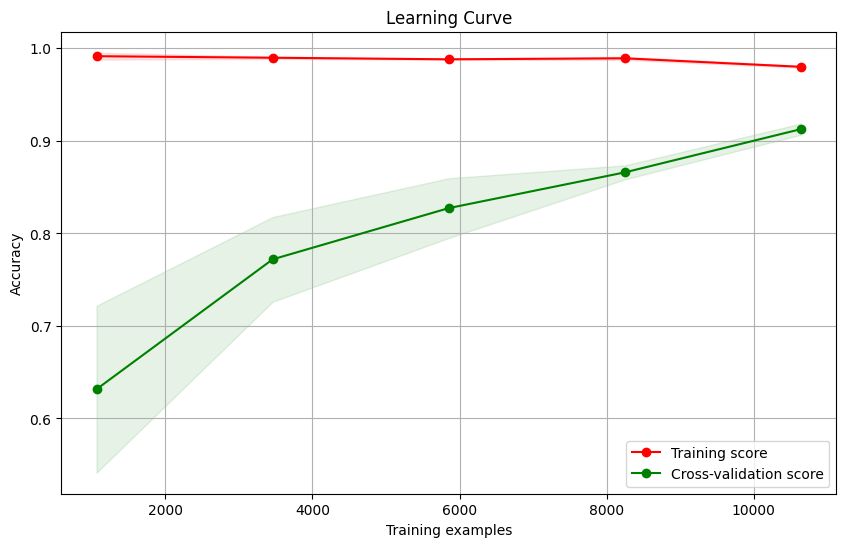

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Définir la fonction pour tracer la courbe d'apprentissage
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Tracer la courbe d'apprentissage pour le modèle optimisé
plot_learning_curve(optimized_logistic_model, X_train_resampled, y_train_resampled)

Courbes ROC pour une classification multiclasse avec l'optimisation du modèle de régression logistique

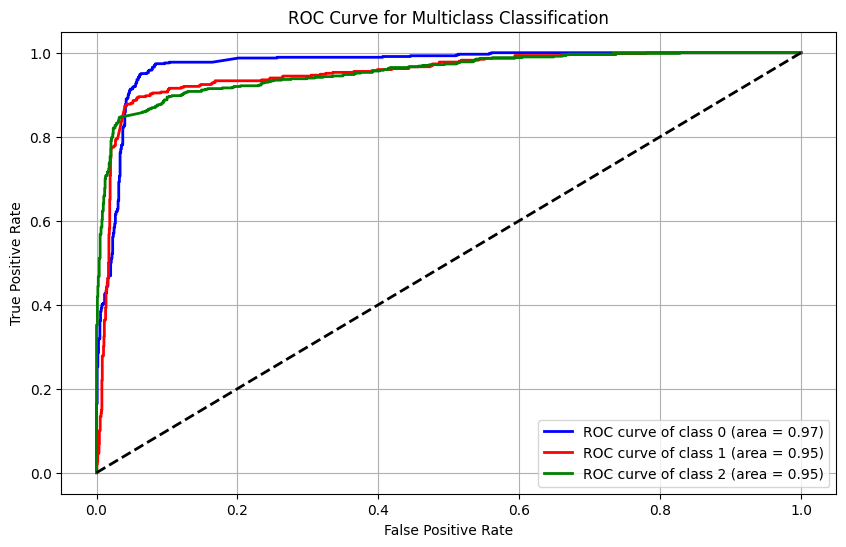

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binariser les labels pour les classes
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Calculer les probabilités prédites pour chaque classe
y_pred_proba = optimized_logistic_model.predict_proba(X_test)

# Calculer la courbe ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer la courbe ROC pour chaque classe
plt.figure(figsize=(10, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Matrice de Confusion pour l'Évaluation du Modèle

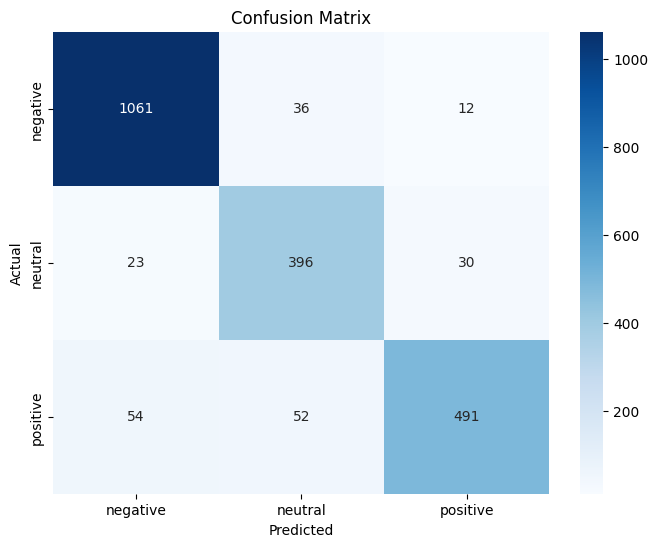

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_optimized)

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Courbes de Précision-Rappel pour la Classification Multiclasse

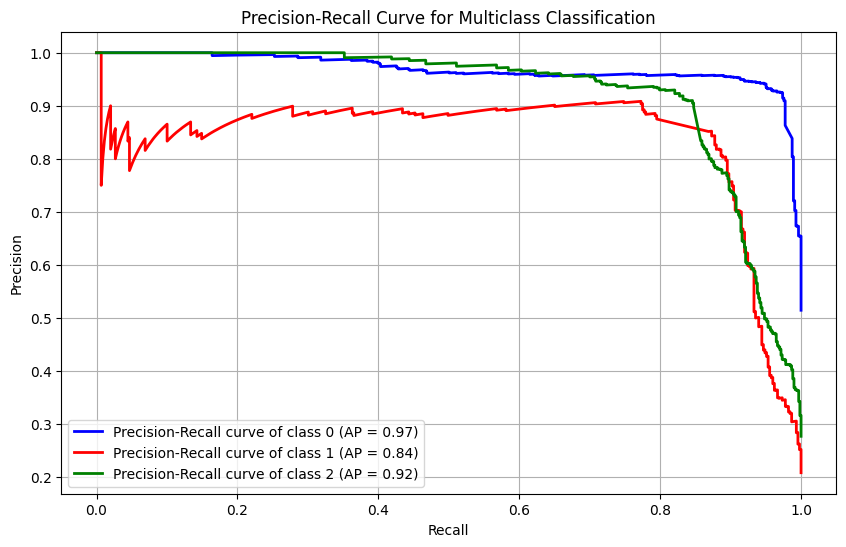

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculer la précision et le rappel pour chaque classe
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])

# Tracer la courbe de précision-rappel pour chaque classe
plt.figure(figsize=(10, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-Recall curve of class {0} (AP = {1:0.2f})'
             ''.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification')
plt.legend(loc="best")
plt.grid()
plt.show()

Évaluation du Modèle SVM pour la Classification des Sentiments avec Rapport de Classification, ROC-AUC et Précision

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# 1. Initialiser le modèle SVM avec un noyau RBF (par défaut)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# 2. Entraîner le modèle sur l'ensemble d'entraînement rééchantillonné (SMOTE)
svm_model.fit(X_train_resampled, y_train_resampled)

# 3. Faire des prédictions sur l'ensemble de test
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)  # Probabilités pour chaque classe

# 4. Évaluer le modèle SVM
# 4.1 Rapport de classification
print("Classification Report (SVM) :")
print(classification_report(y_test, y_pred_svm, target_names=['negative', 'neutral', 'positive']))

# 4.2 Score ROC-AUC (pour les problèmes multiclasses)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm, multi_class='ovr')  # 'ovr' : One-vs-Rest
print(f"ROC-AUC Score (SVM) : {roc_auc_svm:.4f}")

# 4.3 Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy du modèle SVM : {accuracy_svm:.4f}")

Classification Report (SVM) :
              precision    recall  f1-score   support

    negative       0.88      0.98      0.93      1109
     neutral       0.93      0.80      0.86       448
    positive       0.93      0.82      0.87       598

    accuracy                           0.90      2155
   macro avg       0.91      0.87      0.89      2155
weighted avg       0.90      0.90      0.90      2155

ROC-AUC Score (SVM) : 0.9833
Accuracy du modèle SVM : 0.8998


In [37]:

import joblib

# 2. Définir le chemin de sauvegarde dans Google Drive
save_path = '/content/drive/MyDrive/svm_model_multiple.pkl'  # Changez le nom du fichier si nécessaire

# 3. Sauvegarder le modèle SVM
joblib.dump(svm_model, save_path)

print(f"Modèle SVM sauvegardé à l'emplacement : {save_path}")

Modèle SVM sauvegardé à l'emplacement : /content/drive/MyDrive/svm_model_multiple.pkl


Courbe d'Apprentissage (Learning Curve)

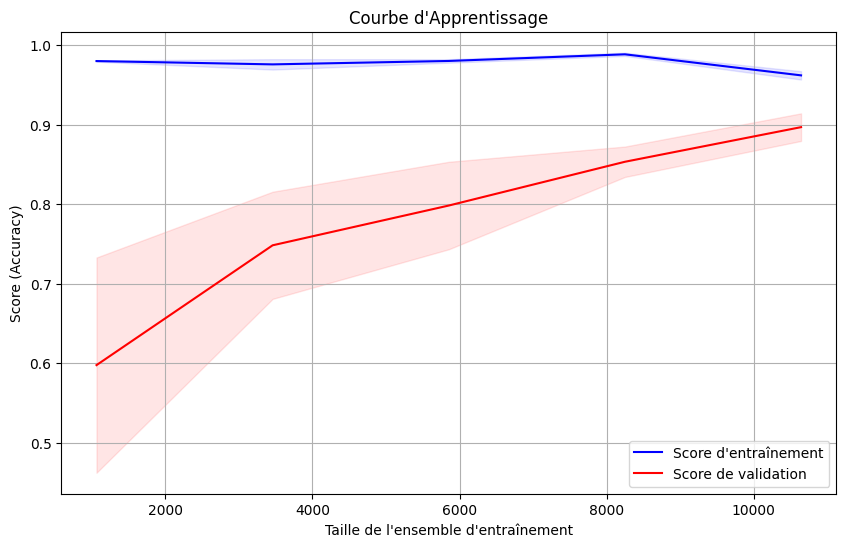

In [38]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Calculer la courbe d'apprentissage
train_sizes, train_scores, val_scores = learning_curve(
    svm_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1
)

# Calculer les moyennes et écarts-types
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Tracer la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Score d'entraînement", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="blue")
plt.plot(train_sizes, val_scores_mean, label="Score de validation", color="red")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="red")
plt.title("Courbe d'Apprentissage")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score (Accuracy)")
plt.legend(loc="best")
plt.grid()
plt.show()

Courbes ROC pour une Classification Multiclasse

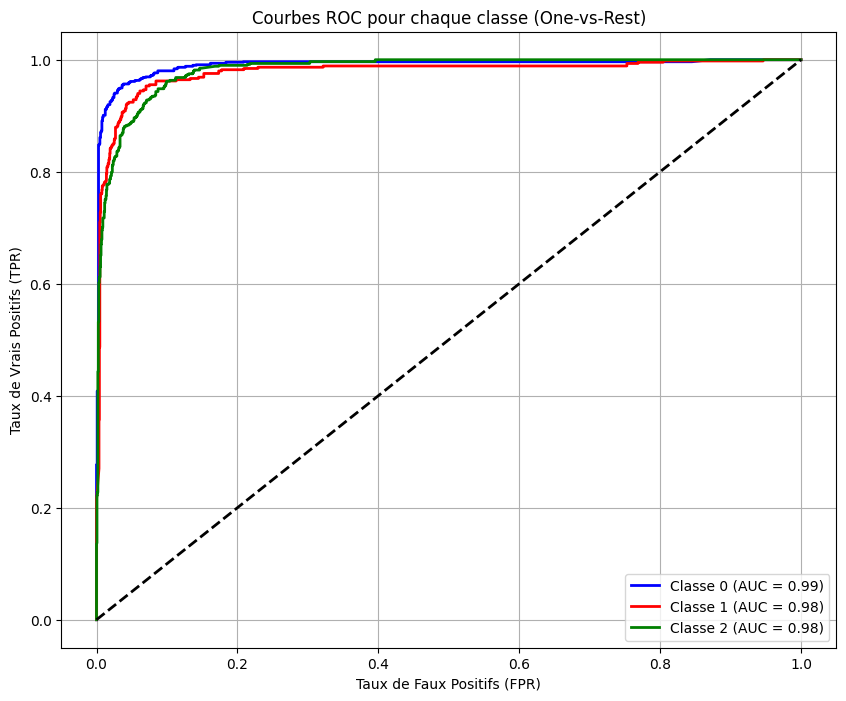

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binariser les labels pour une classification multiclasse
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Calculer les probabilités prédites pour chaque classe
y_pred_proba_svm = svm_model.predict_proba(X_test)

# Tracer les courbes ROC pour chaque classe
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_svm[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Classe {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbes ROC pour chaque classe (One-vs-Rest)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

Matrice de Confusion

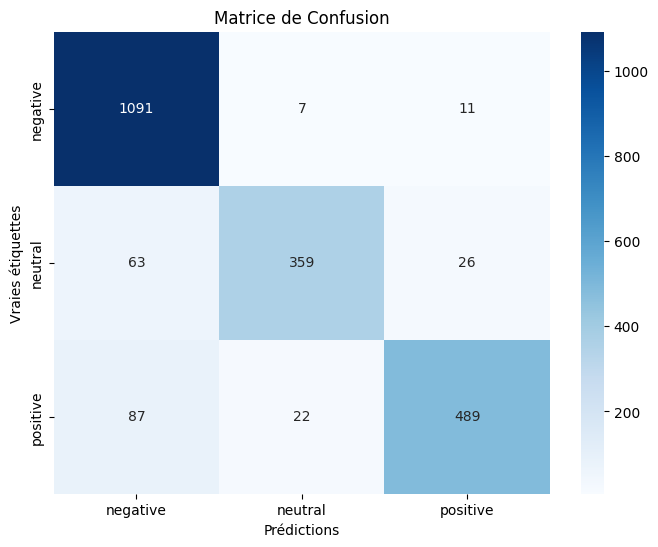

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_svm)

# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()

Courbes Precision-Recall pour une Classification Multiclasse

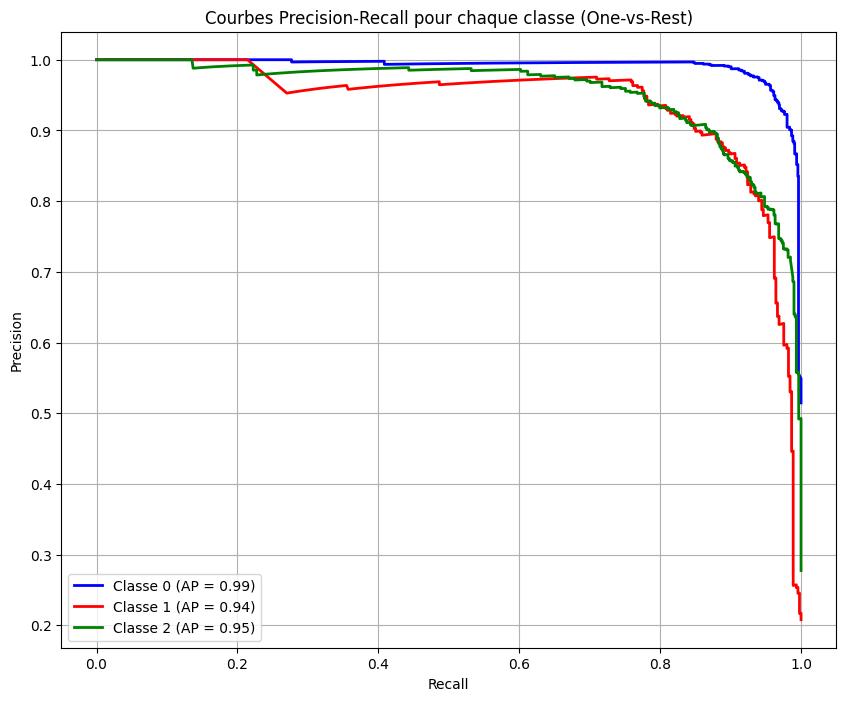

In [41]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculer les courbes Precision-Recall pour chaque classe
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba_svm[:, i])
    avg_precision = average_precision_score(y_test_bin[:, i], y_pred_proba_svm[:, i])
    plt.plot(recall, precision, color=color, lw=2, label=f'Classe {i} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Courbes Precision-Recall pour chaque classe (One-vs-Rest)')
plt.legend(loc="best")
plt.grid()
plt.show()

Optimisation des hyperparamètres d'un modèle SVM avec RandomizedSearchCV

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {
    'C': loguniform(1e-3, 1e3),  # Distribution logarithmique pour C
    'gamma': loguniform(1e-3, 1e3),  # Distribution logarithmique pour gamma
    'kernel': ['rbf', 'linear']
}

random_search = RandomizedSearchCV(
    SVC(probability=True, random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Nombre de combinaisons à tester
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train_resampled, y_train_resampled)
print("Meilleurs hyperparamètres :", random_search.best_params_)

Meilleurs hyperparamètres : {'C': 793.2047656808546, 'gamma': 0.6317967091932509, 'kernel': 'rbf'}


In [43]:
# Réentraîner le modèle avec les meilleurs hyperparamètres
best_svm_model = SVC(
    C=793.2047656808546,
    gamma=0.6317967091932509,
    kernel='rbf',
    probability=True,
    random_state=42
)
best_svm_model.fit(X_train_resampled, y_train_resampled)
# Faire des prédictions sur l'ensemble de test
y_pred_best_svm = best_svm_model.predict(X_test)
y_pred_proba_best_svm = best_svm_model.predict_proba(X_test)

# Évaluer le modèle
print("Classification Report (Meilleur SVM) :")
print(classification_report(y_test, y_pred_best_svm, target_names=['negative', 'neutral', 'positive']))

roc_auc_best_svm = roc_auc_score(y_test, y_pred_proba_best_svm, multi_class='ovr')
print(f"ROC-AUC Score (Meilleur SVM) : {roc_auc_best_svm:.4f}")

accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print(f"Accuracy du meilleur modèle SVM : {accuracy_best_svm:.4f}")

Classification Report (Meilleur SVM) :
              precision    recall  f1-score   support

    negative       0.89      0.98      0.94      1109
     neutral       0.87      0.85      0.86       448
    positive       0.94      0.79      0.86       598

    accuracy                           0.90      2155
   macro avg       0.90      0.87      0.88      2155
weighted avg       0.90      0.90      0.90      2155

ROC-AUC Score (Meilleur SVM) : 0.9773
Accuracy du meilleur modèle SVM : 0.9002


Évaluation du Modèle Naive Bayes pour la Classification des Sentiments avec Rapport de Classification, ROC-AUC et Précision

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# 1. Initialiser le modèle Naive Bayes
nb_model = MultinomialNB()

# 2. Entraîner le modèle sur l'ensemble d'entraînement rééchantillonné (SMOTE)
nb_model.fit(X_train_resampled, y_train_resampled)

# 3. Faire des prédictions sur l'ensemble de test
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)  # Probabilités pour chaque classe

# 4. Évaluer le modèle Naive Bayes
# 4.1 Rapport de classification
print("Classification Report (Naive Bayes) :")
print(classification_report(y_test, y_pred_nb, target_names=['negative', 'neutral', 'positive']))

# 4.2 Score ROC-AUC (pour les problèmes multiclasses)
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb, multi_class='ovr')  # 'ovr' : One-vs-Rest
print(f"ROC-AUC Score (Naive Bayes) : {roc_auc_nb:.4f}")

# 4.3 Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy du modèle Naive Bayes : {accuracy_nb:.4f}")

Classification Report (Naive Bayes) :
              precision    recall  f1-score   support

    negative       0.84      0.85      0.85      1109
     neutral       0.77      0.63      0.70       448
    positive       0.73      0.81      0.77       598

    accuracy                           0.79      2155
   macro avg       0.78      0.77      0.77      2155
weighted avg       0.80      0.79      0.79      2155

ROC-AUC Score (Naive Bayes) : 0.9205
Accuracy du modèle Naive Bayes : 0.7949


Entraîner et évaluer un modèle Random Forest multiclasse

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# 1. Initialiser le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entraîner le modèle sur l'ensemble d'entraînement rééchantillonné (SMOTE)
rf_model.fit(X_train_resampled, y_train_resampled)

# 3. Faire des prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)  # Probabilités pour chaque classe

# 4. Évaluer le modèle Random Forest
# 4.1 Rapport de classification
print("Classification Report (Random Forest) :")
print(classification_report(y_test, y_pred_rf, target_names=['negative', 'neutral', 'positive']))

# 4.2 Score ROC-AUC (pour les problèmes multiclasses)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf, multi_class='ovr')  # 'ovr' : One-vs-Rest
print(f"ROC-AUC Score (Random Forest) : {roc_auc_rf:.4f}")

# 4.3 Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy du modèle Random Forest : {accuracy_rf:.4f}")

Classification Report (Random Forest) :
              precision    recall  f1-score   support

    negative       0.90      0.98      0.94      1109
     neutral       0.89      0.85      0.87       448
    positive       0.92      0.80      0.86       598

    accuracy                           0.90      2155
   macro avg       0.91      0.88      0.89      2155
weighted avg       0.90      0.90      0.90      2155

ROC-AUC Score (Random Forest) : 0.9835
Accuracy du modèle Random Forest : 0.9035


In [46]:
# Définir le chemin de sauvegarde dans Google Drive
save_path_rf = '/content/drive/MyDrive/rf_model_multiple.pkl'  # Changez le nom du fichier si nécessaire

# Sauvegarder le modèle Random Forest
joblib.dump(rf_model, save_path_rf)

print(f"Modèle Random Forest sauvegardé à l'emplacement : {save_path_rf}")

Modèle Random Forest sauvegardé à l'emplacement : /content/drive/MyDrive/rf_model_multiple.pkl


Améliorer le modèle Random Forest

In [47]:
from sklearn.model_selection import GridSearchCV

# Définir la grille des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale des arbres
    'max_features': ['sqrt', 'log2']  # Nombre de caractéristiques à considérer pour chaque split
}

# Initialiser GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Appliquer GridSearchCV sur les données rééchantillonnées
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres pour Random Forest :", grid_search_rf.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Évaluer le meilleur modèle
print("Classification Report (Random Forest Optimisé) :")
print(classification_report(y_test, y_pred_best_rf, target_names=['negative', 'neutral', 'positive']))

Meilleurs hyperparamètres pour Random Forest : {'max_depth': None, 'max_features': 'log2', 'n_estimators': 200}
Classification Report (Random Forest Optimisé) :
              precision    recall  f1-score   support

    negative       0.91      0.99      0.94      1109
     neutral       0.90      0.84      0.87       448
    positive       0.94      0.83      0.88       598

    accuracy                           0.91      2155
   macro avg       0.91      0.88      0.90      2155
weighted avg       0.91      0.91      0.91      2155



In [48]:
# 7. Calculer les probabilités prédites pour chaque classe
y_pred_proba_best_rf = best_rf_model.predict_proba(X_test)

# 8. Calculer le score ROC-AUC (pour les problèmes multiclasses)
roc_auc_best_rf = roc_auc_score(y_test, y_pred_proba_best_rf, multi_class='ovr')  # 'ovr' : One-vs-Rest
print(f"ROC-AUC Score (Random Forest Optimisé) : {roc_auc_best_rf:.4f}")

# 9. Calculer l'Accuracy
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy du modèle Random Forest optimisé : {accuracy_best_rf:.4f}")

ROC-AUC Score (Random Forest Optimisé) : 0.9861
Accuracy du modèle Random Forest optimisé : 0.9123


In [49]:
# Définir le chemin de sauvegarde dans Google Drive
save_path_rf = '/content/drive/MyDrive/best_rf_model_multipleavecgrid.pkl'  # Changez le nom du fichier si nécessaire

# Sauvegarder le modèle Random Forest optimisé
joblib.dump(best_rf_model, save_path_rf)

print(f"Modèle Random Forest optimisé sauvegardé à l'emplacement : {save_path_rf}")

Modèle Random Forest optimisé sauvegardé à l'emplacement : /content/drive/MyDrive/best_rf_model_multipleavecgrid.pkl


Courbe d'apprentissage (Learning Curve)

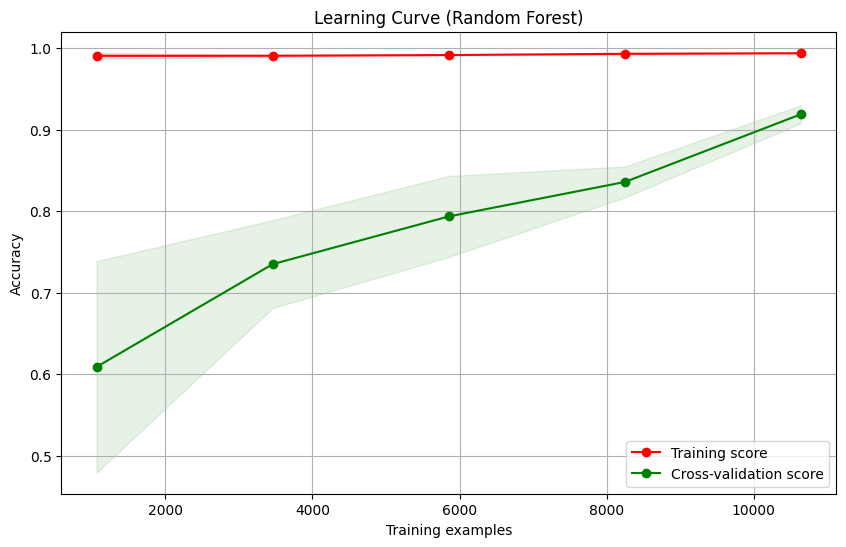

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle

# 1. Courbe d'apprentissage (Learning Curve)
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve (Random Forest)")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Tracer la courbe d'apprentissage
plot_learning_curve(best_rf_model, X_train_resampled, y_train_resampled)

Courbes ROC

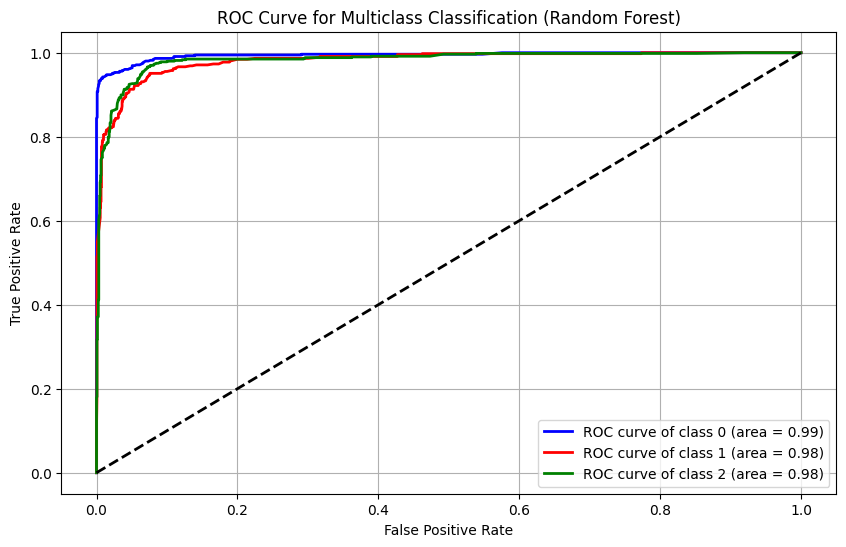

In [51]:
# 2. Courbes ROC pour une classification multiclasse
# Binariser les labels pour les classes
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Calculer les probabilités prédites pour chaque classe
y_pred_proba_best_rf = best_rf_model.predict_proba(X_test)

# Calculer la courbe ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_best_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer la courbe ROC pour chaque classe
plt.figure(figsize=(10, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification (Random Forest)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Matrice de confusion

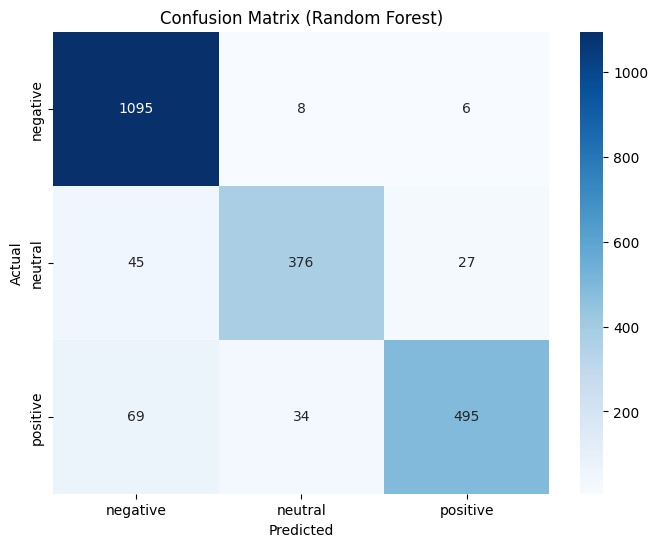

In [52]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred_best_rf)

# Tracer la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

Courbes Precision-Recall pour une classification multiclasse

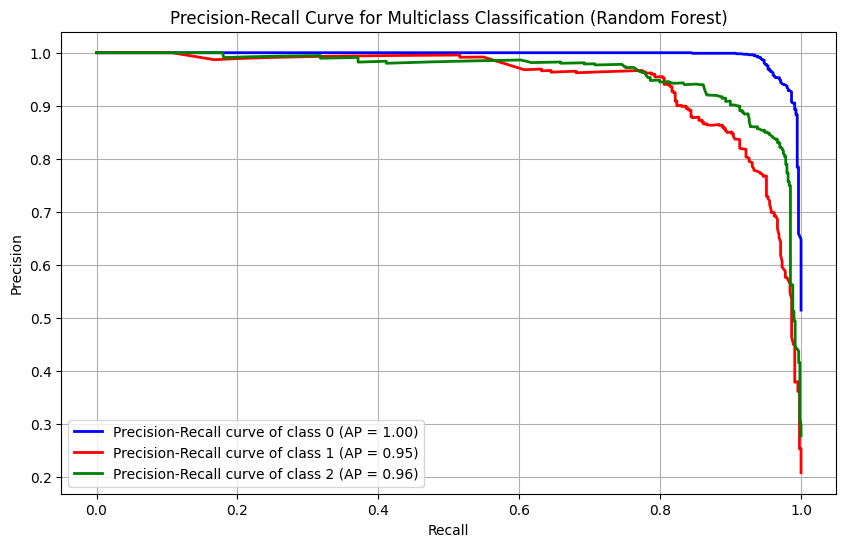

In [53]:
# 4. Courbes Precision-Recall pour une classification multiclasse
# Calculer la précision et le rappel pour chaque classe
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba_best_rf[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred_proba_best_rf[:, i])

# Tracer la courbe de précision-rappel pour chaque classe
plt.figure(figsize=(10, 6))
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-Recall curve of class {0} (AP = {1:0.2f})'
             ''.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Classification (Random Forest)')
plt.legend(loc="best")
plt.grid()
plt.show()

le modèle Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# 1. Initialiser le modèle Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Entraîner le modèle sur l'ensemble d'entraînement rééchantillonné (SMOTE)
dt_model.fit(X_train_resampled, y_train_resampled)

# 3. Faire des prédictions sur l'ensemble de test
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)  # Probabilités pour chaque classe

# 4. Évaluer le modèle Decision Tree
# 4.1 Rapport de classification
print("Classification Report (Decision Tree) :")
print(classification_report(y_test, y_pred_dt, target_names=['negative', 'neutral', 'positive']))

# 4.2 Score ROC-AUC (pour les problèmes multiclasses)
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt, multi_class='ovr')  # 'ovr' : One-vs-Rest
print(f"ROC-AUC Score (Decision Tree) : {roc_auc_dt:.4f}")

# 4.3 Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy du modèle Decision Tree : {accuracy_dt:.4f}")

Classification Report (Decision Tree) :
              precision    recall  f1-score   support

    negative       0.88      0.97      0.92      1109
     neutral       0.84      0.85      0.85       448
    positive       0.90      0.72      0.80       598

    accuracy                           0.88      2155
   macro avg       0.87      0.85      0.86      2155
weighted avg       0.88      0.88      0.87      2155

ROC-AUC Score (Decision Tree) : 0.8916
Accuracy du modèle Decision Tree : 0.8766


Évaluation du Modèle KNN pour la Classification des Sentiments avec Rapport de Classification, ROC-AUC et Précision

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# 1. Initialiser le modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins (k)

# 2. Entraîner le modèle sur l'ensemble d'entraînement rééchantillonné (SMOTE)
knn_model.fit(X_train_resampled, y_train_resampled)

# 3. Faire des prédictions sur l'ensemble de test
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)  # Probabilités pour chaque classe

# 4. Évaluer le modèle KNN
# 4.1 Rapport de classification
print("Classification Report (KNN) :")
print(classification_report(y_test, y_pred_knn, target_names=['negative', 'neutral', 'positive']))

# 4.2 Score ROC-AUC (pour les problèmes multiclasses)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr')  # 'ovr' : One-vs-Rest
print(f"ROC-AUC Score (KNN) : {roc_auc_knn:.4f}")

# 4.3 Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy du modèle KNN : {accuracy_knn:.4f}")

Classification Report (KNN) :
              precision    recall  f1-score   support

    negative       0.97      0.36      0.52      1109
     neutral       0.41      0.86      0.55       448
    positive       0.57      0.76      0.65       598

    accuracy                           0.58      2155
   macro avg       0.65      0.66      0.58      2155
weighted avg       0.74      0.58      0.57      2155

ROC-AUC Score (KNN) : 0.8946
Accuracy du modèle KNN : 0.5763
